In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [2]:
X_train = data_train.loc[ : , data_train.columns != 'y'] 
y_train = data_train["y"]
X_test = data_test.loc[ : , data_test.columns != 'y'] 
y_test = data_test["y"]

In [3]:
from sklearn.neighbors import KNeighborsClassifier 
  
knn = KNeighborsClassifier(n_neighbors = 1) 
  
knn.fit(X_train, y_train) 
pred = knn.predict(X_test) 
prob = knn.predict_proba(X_test)[::,1]
  
# Predictions and Evaluations   
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, pred)) 
  
print(classification_report(y_test, pred)) 

[[290 201]
 [189 320]]
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       491
           1       0.61      0.63      0.62       509

    accuracy                           0.61      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.61      0.61      0.61      1000



In [4]:
knn.fit(X_train, y_train).score(X_train,y_train)

1.0

Text(0, 0.5, 'Error Rate')

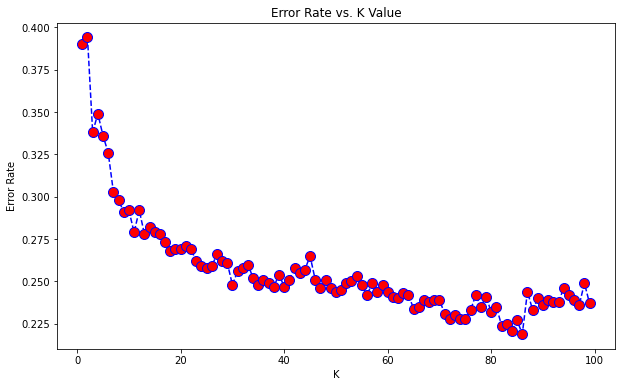

In [5]:
#Choosing a good K value
error_rate = [] 
  
# Will take some time 
for i in range(1, 100): 
      
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, y_train) 
    pred_i = knn.predict(X_test) 
    error_rate.append(np.mean(pred_i != y_test)) 
  
plt.figure(figsize =(10, 6)) 
plt.plot(range(1, 100), error_rate, color ='blue', 
                linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
  
plt.title('Error Rate vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate') 

In [6]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# K = 1 
knn = KNeighborsClassifier(n_neighbors = 1) 
  
knn.fit(X_train, y_train).score(X_train,y_train) 
pred = knn.predict(X_test) 
  
print('WITH K = 1') 
print('\n') 
print(confusion_matrix(y_test, pred)) 
print('\n') 
print(classification_report(y_test, pred))
  
  
# NOW WITH K = 40 
knn = KNeighborsClassifier(n_neighbors = 40) 
  
knn.fit(X_train, y_train).score(X_train,y_train) 
pred = knn.predict(X_test) 
  
print('WITH K = 40') 
print('\n') 
print(confusion_matrix(y_test, pred)) 
print('\n') 
print(classification_report(y_test, pred))

# NOW WITH K = 85 
knn = KNeighborsClassifier(n_neighbors = 85) 
  
knn.fit(X_train, y_train).score(X_train,y_train) 
pred = knn.predict(X_test) 
  
print('WITH K = 85') 
print('\n') 
print(confusion_matrix(y_test, pred)) 
print('\n') 
print(classification_report(y_test, pred))
accuracy_score(y_test,pred)

WITH K = 1


[[290 201]
 [189 320]]


              precision    recall  f1-score   support

           0       0.61      0.59      0.60       491
           1       0.61      0.63      0.62       509

    accuracy                           0.61      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.61      0.61      0.61      1000

WITH K = 40


[[361 130]
 [117 392]]


              precision    recall  f1-score   support

           0       0.76      0.74      0.75       491
           1       0.75      0.77      0.76       509

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000

WITH K = 85


[[368 123]
 [104 405]]


              precision    recall  f1-score   support

           0       0.78      0.75      0.76       491
           1       0.77      0.80      0.78       509

    accuracy                           0.77      1000
   macro avg

0.773

In [7]:
knn.fit(X_train, y_train).score(X_train,y_train)

0.74

kNN after Scaling Variables

In [8]:
#Scaling training data
from sklearn.preprocessing import StandardScaler 
  
scaler = StandardScaler() 
  
scaler.fit(data_train.drop('y', axis = 1)) 
scaled_features = scaler.transform(data_train.drop('y', axis = 1)) 
  
data_train_feat = pd.DataFrame(scaled_features, columns = data_train.columns[:-1]) 
data_train_feat.head() 

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,1.153031,0.784718,0.499014,-0.966277,-0.528717,-0.498240,0.040984,0.037473,0.592409,-0.343988,0.809785,1.013473,0.675837,-0.152392,-1.017391,1.272025,-0.376527,0.495199,-0.217872,-0.511430
1,-0.220933,-1.488014,-0.607456,-0.997245,0.818413,-1.114845,-0.783456,-1.539793,0.307601,0.594859,1.002239,1.176691,0.345505,-1.427742,1.292026,0.025808,-1.537644,0.739718,0.719206,0.522630
2,-1.140754,0.427524,-0.382392,1.201939,-0.714544,-1.246317,0.752418,-1.456717,1.259176,-1.212157,-1.133825,-0.937167,0.399210,1.506418,0.724377,1.672728,0.868145,1.398761,-0.768774,-0.345925
3,1.447477,-0.501673,-1.645451,1.454652,-1.062778,-1.516082,-0.326536,-1.335859,0.579217,-0.783181,0.791795,1.639310,0.640346,-0.173999,0.005540,-0.867229,0.401621,-0.953781,1.454493,-0.839349
4,-0.812784,-1.242967,0.705886,-0.186466,-0.366384,-1.640729,1.314899,-1.475716,1.507412,-1.094339,1.509415,1.144764,0.151160,0.303112,-0.729664,-0.412329,-0.769439,-0.249531,0.891058,0.773321


In [9]:
#Scaling test data
from sklearn.preprocessing import StandardScaler 
  
scaler = StandardScaler() 
  
scaler.fit(data_test.drop('y', axis = 1)) 
scaled_features = scaler.transform(data_test.drop('y', axis = 1)) 
  
data_test_feat = pd.DataFrame(scaled_features, columns = data_test.columns[:-1]) 
data_test_feat.head() 

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,-0.586069,-1.323905,-0.605795,1.353687,-1.148883,-0.952766,0.268445,-0.264606,0.813764,0.234430,0.872405,-1.105173,-0.453036,0.451522,0.113099,0.547201,-0.786846,0.806010,-0.324040,-0.456173
1,-1.267585,1.388626,-1.052685,1.241307,-1.699771,-0.160082,-0.575228,-1.270022,-1.190937,-0.926227,-0.335385,-1.159048,-0.974209,1.473062,-0.330394,0.653972,1.629568,1.497961,0.849466,1.751419
2,0.953881,-0.975591,0.723231,-1.051569,-0.524438,1.488871,-0.765249,0.561704,-1.590773,-0.998138,1.494330,-0.769169,-0.141610,1.105775,-0.132393,-1.442147,-1.606821,0.001051,-0.017386,1.748502
3,-1.401324,0.458393,0.934580,-0.483231,-1.349638,-0.737958,-1.657105,-0.705003,-1.516274,-1.432102,0.317207,1.135862,1.564586,1.342863,0.219574,-0.091157,1.506397,0.614114,0.014069,1.347653
4,-0.791132,-0.970728,-0.151423,-1.627708,0.373797,1.132199,-1.157970,-0.602181,-0.930517,0.341521,-1.738367,-1.642769,0.808460,0.532579,-1.232900,-1.763772,0.827946,-0.145110,0.441116,-0.514650


In [10]:
X_train = data_train_feat
y_train = data_train["y"]
X_test = data_test_feat 
y_test = data_test["y"]

In [11]:
from sklearn.neighbors import KNeighborsClassifier 
  
knn = KNeighborsClassifier(n_neighbors = 1) 
  
knn.fit(X_train, y_train).score(X_train,y_train) 
pred = knn.predict(X_test) 
  
# Predictions and Evaluations   
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, pred)) 
  
print(classification_report(y_test, pred)) 

[[292 199]
 [194 315]]
              precision    recall  f1-score   support

           0       0.60      0.59      0.60       491
           1       0.61      0.62      0.62       509

    accuracy                           0.61      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.61      0.61      0.61      1000



In [12]:
knn.fit(X_train, y_train).score(X_train,y_train)

1.0

Text(0, 0.5, 'Error Rate')

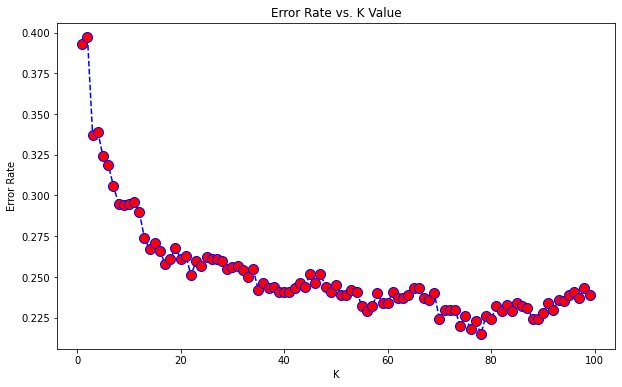

In [13]:
#Choosing a good K value
error_rate = [] 
  
# Will take some time 
for i in range(1, 100): 
      
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, y_train) 
    pred_i = knn.predict(X_test) 
    error_rate.append(np.mean(pred_i != y_test)) 
  
plt.figure(figsize =(10, 6)) 
plt.plot(range(1, 100), error_rate, color ='blue', 
                linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
  
plt.title('Error Rate vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate') 

In [14]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# K = 1 
knn = KNeighborsClassifier(n_neighbors = 1) 
  
knn.fit(X_train, y_train).score(X_train,y_train) 
pred = knn.predict(X_test) 
  
print('WITH K = 1') 
print('\n') 
print(confusion_matrix(y_test, pred)) 
print('\n') 
print(classification_report(y_test, pred))
  
  
# NOW WITH K = 40 
knn = KNeighborsClassifier(n_neighbors = 40) 
  
knn.fit(X_train, y_train).score(X_train,y_train) 
pred = knn.predict(X_test) 
  
print('WITH K = 40') 
print('\n') 
print(confusion_matrix(y_test, pred)) 
print('\n') 
print(classification_report(y_test, pred))

# NOW WITH K = 78 
knn = KNeighborsClassifier(n_neighbors = 78) 
  
knn.fit(X_train, y_train).score(X_train,y_train) 
pred = knn.predict(X_test)
prob = knn.predict_proba(X_test)[::,1]
  
print('WITH K = 78') 
print('\n') 
print(confusion_matrix(y_test, pred)) 
print('\n') 
print(classification_report(y_test, pred))
accuracy_score(y_test,pred)

WITH K = 1


[[292 199]
 [194 315]]


              precision    recall  f1-score   support

           0       0.60      0.59      0.60       491
           1       0.61      0.62      0.62       509

    accuracy                           0.61      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.61      0.61      0.61      1000

WITH K = 40


[[370 121]
 [120 389]]


              precision    recall  f1-score   support

           0       0.76      0.75      0.75       491
           1       0.76      0.76      0.76       509

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000

WITH K = 78


[[392  99]
 [116 393]]


              precision    recall  f1-score   support

           0       0.77      0.80      0.78       491
           1       0.80      0.77      0.79       509

    accuracy                           0.79      1000
   macro avg

0.785

In [15]:
knn.fit(X_train, y_train).score(X_train,y_train)

0.765

In [16]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test, pred)))

F1 Score: 0.7852147852147852


In [17]:
from sklearn.metrics import recall_score
recall_score(y_test, pred)

0.7721021611001965

In [18]:
roc_auc = roc_auc_score(y_test, prob)
print('AUC: %.2f' % roc_auc )

AUC: 0.84


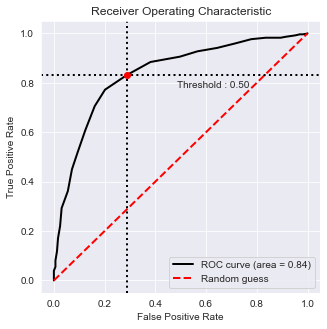

In [19]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test,
                          prob,
                          labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()